# EDA

In [2]:
import numpy as np
import scipy 
import seaborn as sns
import pandas as pd
import patsy
import matplotlib
import matplotlib.pyplot as plt
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import requests
import random
import sys
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('fivethirtyeight')
from IPython.display import display
from bs4 import BeautifulSoup

from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import cross_val_score, train_test_split

from sklearn.feature_extraction.text import CountVectorizer

In [188]:
# import clean data

users_clean_df = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/clean_users_oct4.csv')
revs_clean_df = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/clean_revs_oct4.csv')
hostels_clean_df = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/clean_hostels_oct4.csv')

## EDA Revs DF
- What countries recieve the most reviews 
- What countries recieve the highest review scores
- What months have the most reviews
- What months have the highest mean scores
- Hist of Review Scores


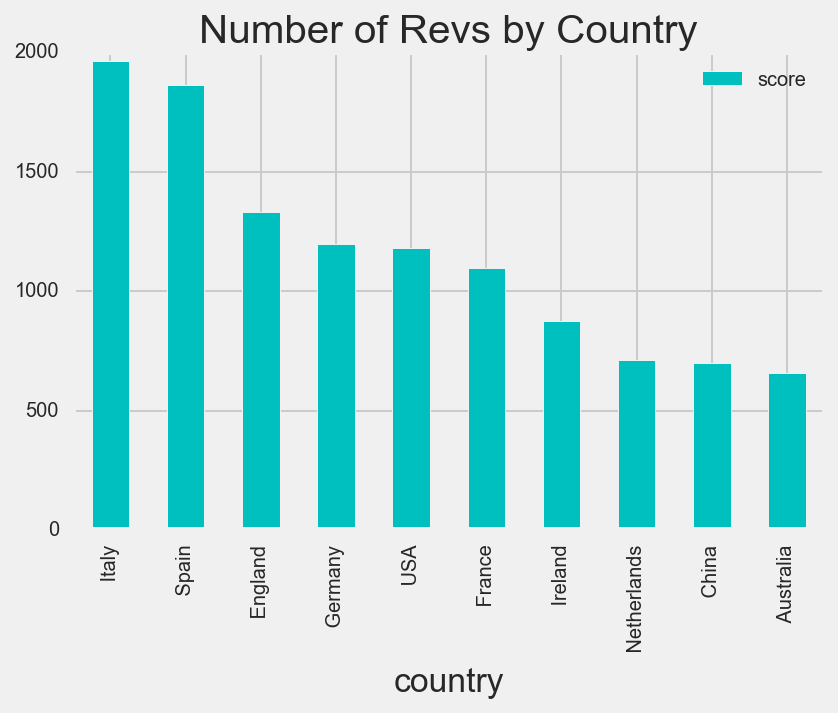

In [189]:
# Bar Graph of rev counts by country 

revs_clean_df.groupby(['country'])[['score']].count().sort_values('score', ascending = False).head(10).plot(
    kind='bar', color = 'c',title = 'Number of Revs by Country')

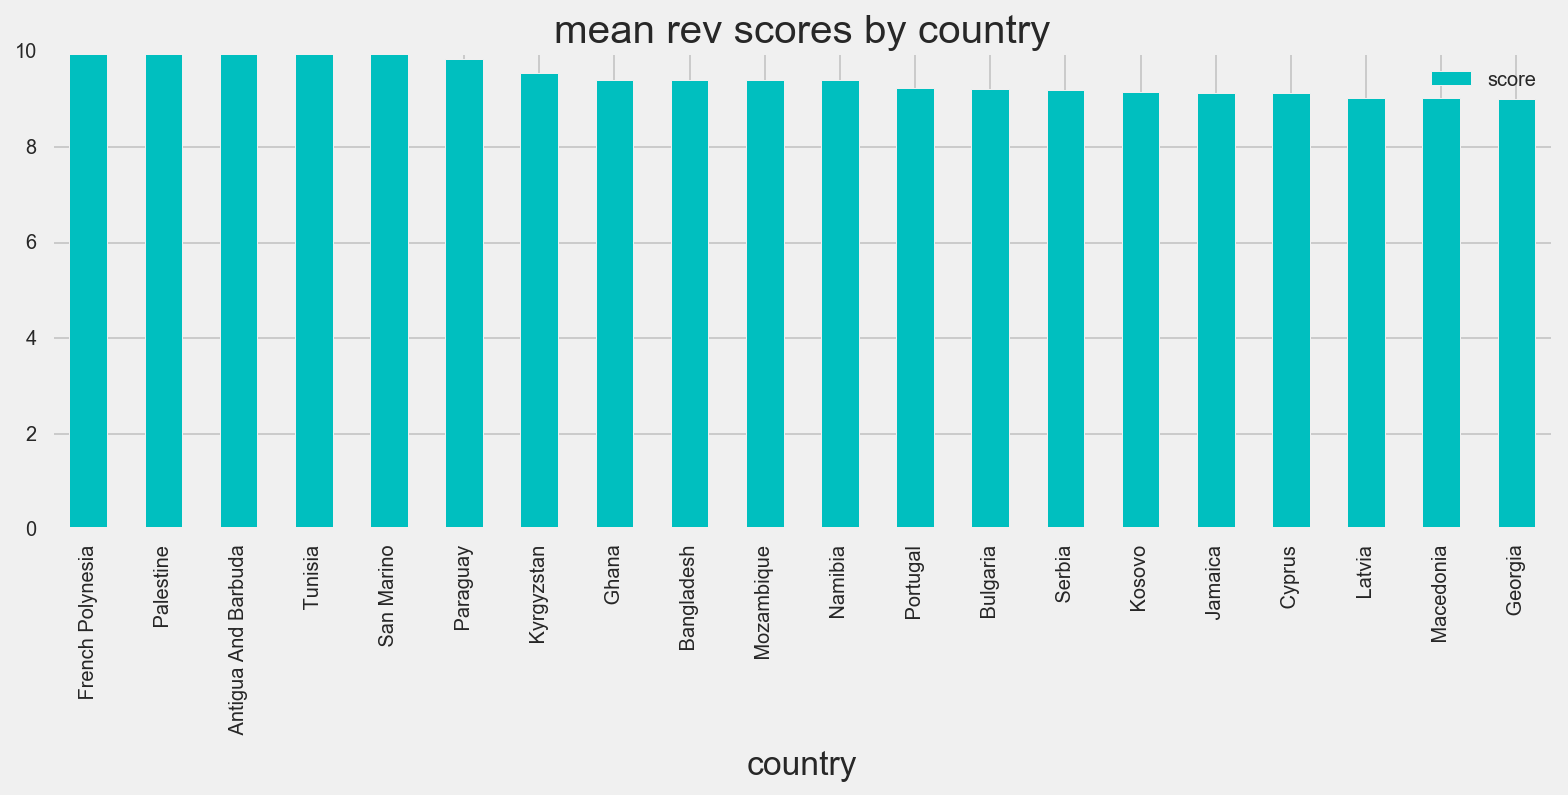

In [193]:
# Bar Graph of mean rev scores by country 

revs_clean_df.groupby(['country'])[['score']].mean().sort_values('score', ascending = False).head(20).plot(
    kind='bar', title = 'mean rev scores by country', color = 'c', figsize = (12,4))

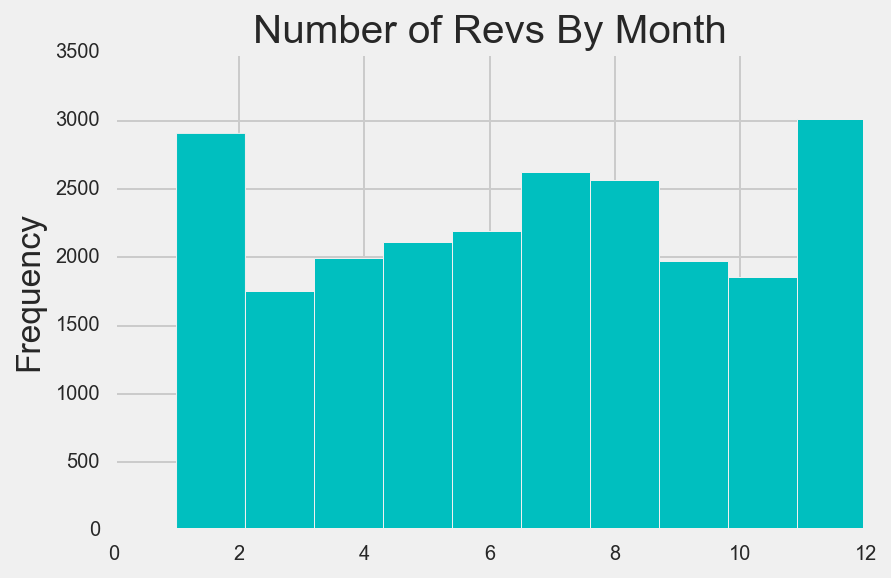

In [194]:
# Hist of Number of reviews by Month 

revs_clean_df['month'].plot( kind = 'hist', color = 'c',title = 'Number of Revs By Month')

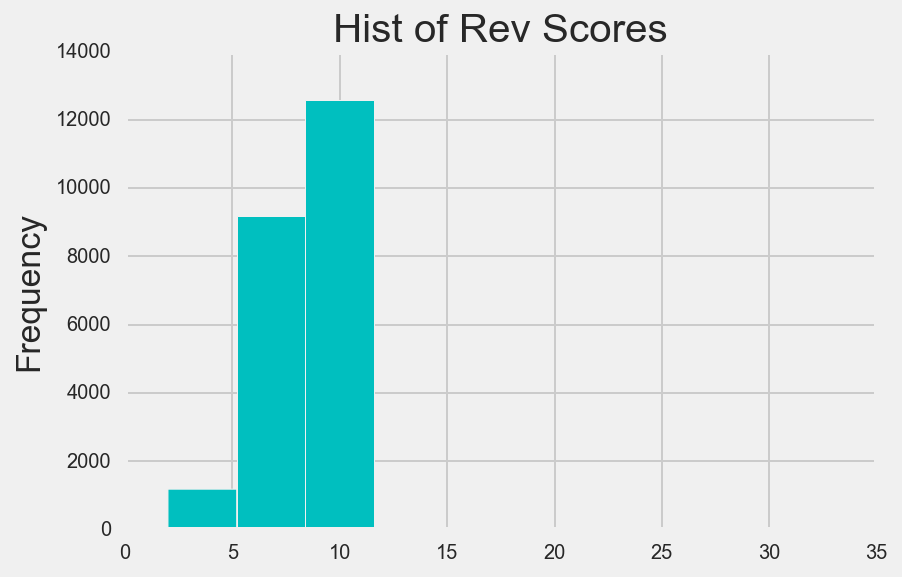

In [197]:
revs_clean_df['score'].plot(kind = 'hist', color = 'c', bins =10, title = 'Hist of Rev Scores')

## EDA Users DF
- Where are most users from
- Which users leave the most reviews
- What kinds of travel groups are most users in
- What age groups are most users in 

In [198]:
users_clean_df.head(2)

,Unnamed: 0,Unnamed: 0.1,user_id,num_revs,nationality,group,age
0,0,101,1189474,2,England,NaN,not specified
1,1,102,1595059,2,Hong Kong,NaN,not specified


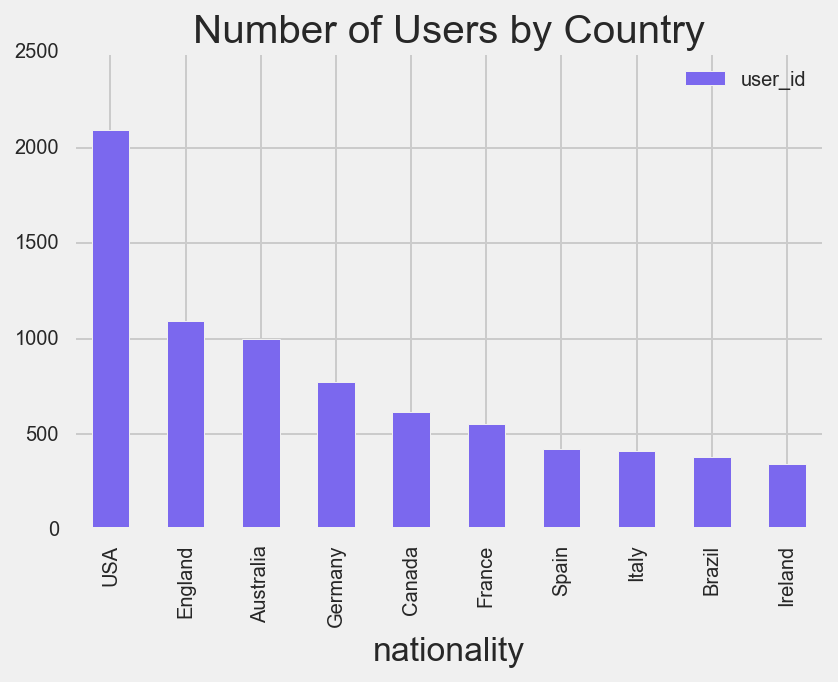

In [199]:
# Bar Graph of Users by Country

users_clean_df.groupby(['nationality'])[['user_id']].count().sort_values('user_id', ascending = False).head(10).plot(
    kind='bar',title = 'Number of Users by Country', color = 'mediumslateblue')

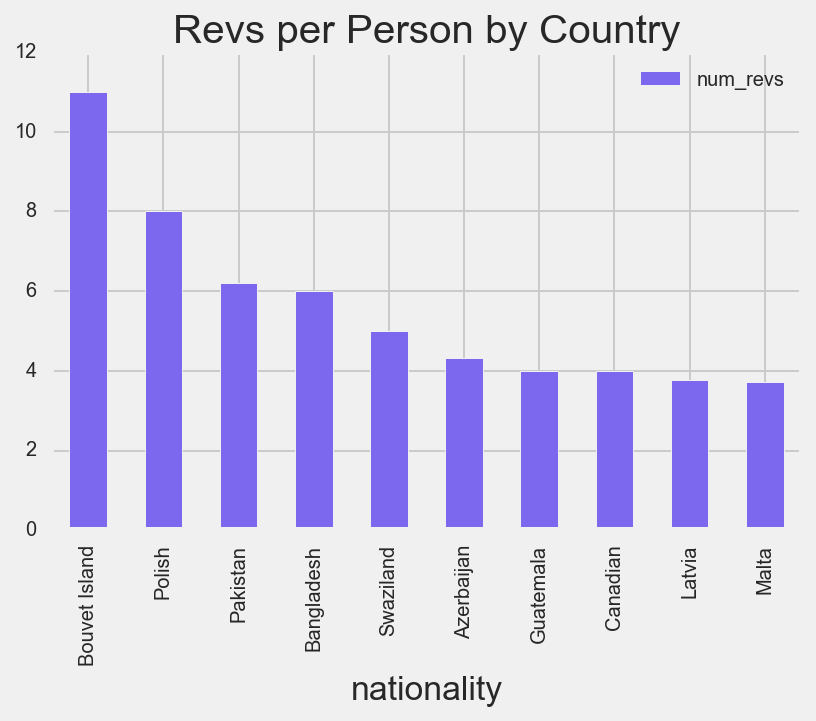

In [200]:
# Revs per person by country

users_clean_df.groupby(['nationality'])[['num_revs']].mean().sort_values('num_revs', ascending = False).head(10).plot(
    kind='bar', title = 'Revs per Person by Country', color = 'mediumslateblue')

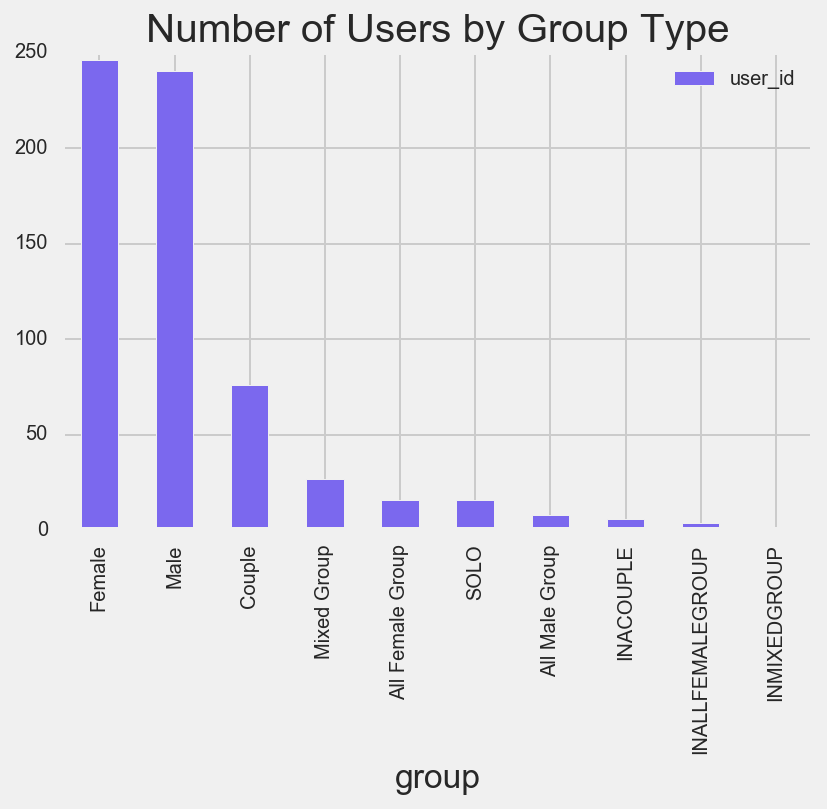

In [44]:
# Bar Graph of Users by Group type

users_clean_df.groupby(['group'])[['user_id']].count().sort_values('user_id', ascending = False).head(10).plot(
    kind='bar',title = 'Number of Users by Group Type', color = 'mediumslateblue')

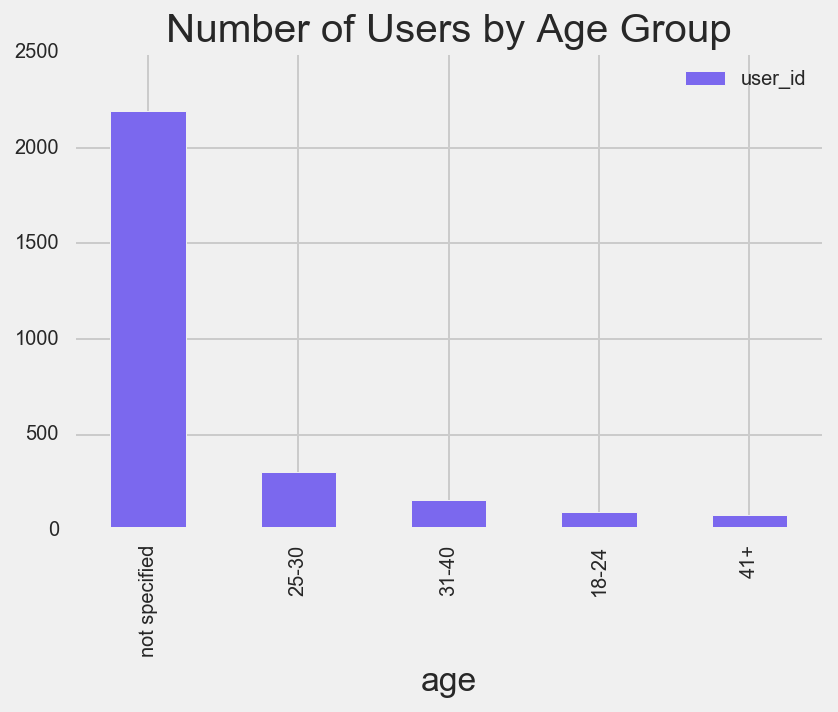

In [160]:
# Bar Graph of Users by Age Group

users_clean_df.groupby(['age'])[['user_id']].count().sort_values('user_id', ascending = False).head(10).plot(
    kind='bar',title = 'Number of Users by Age Group', color = 'mediumslateblue')

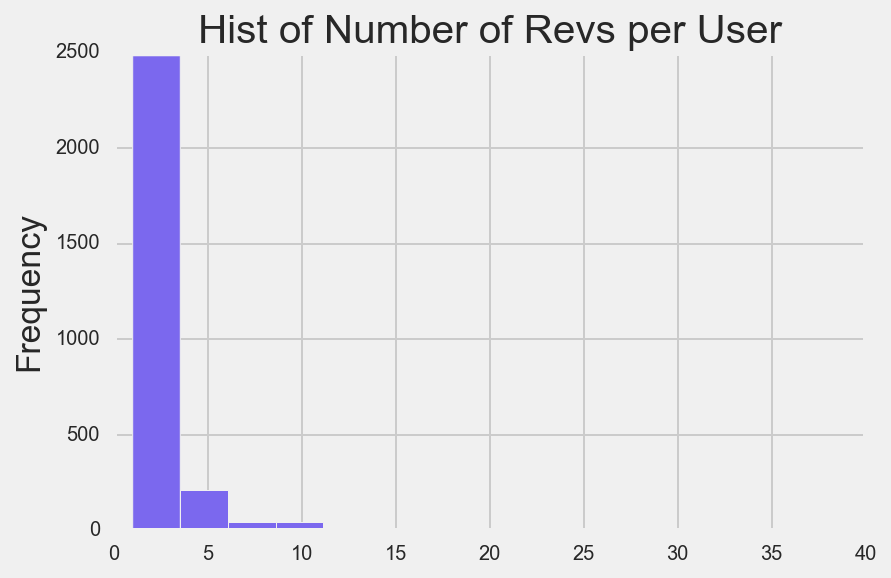

In [179]:
users_clean_df['num_revs'].plot(kind = 'hist', bins = 15,
                                title = 'Hist of Number of Revs per User', color = 'mediumslateblue')

In [7]:
# users by country DF
nat_count = pd.DataFrame(users_clean_df.groupby(['nationality'])[['user_id']].count().sort_values('user_id', ascending = False))
nat_count = nat_count.reset_index()
nat_count.head()

,nationality,user_id
0,USA,591
1,England,300
2,Australia,257
3,Canada,194
4,Germany,175


In [8]:
# save users by country to csv

nat_count.to_csv(path_or_buf='/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/raw-data/nat_count.csv')

## EDA Hostels DF
- Hist of hostel scores
- What countries are most hostels in
- What countries have the highest avg hostel scores

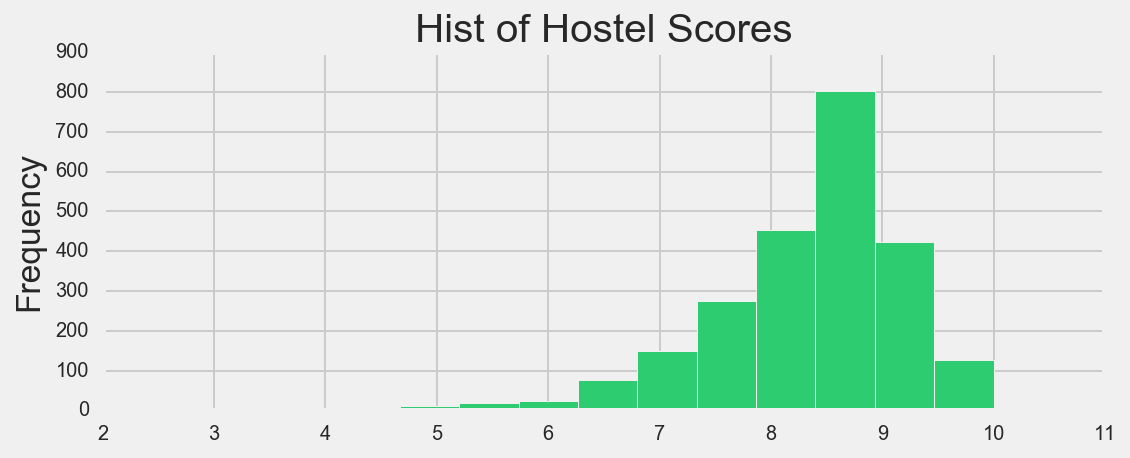

In [187]:
hostels_clean_df.rating.plot(kind = 'hist',bins=15,color = "#2ecc71", title = 'Hist of Hostel Scores',figsize=(8,3))

In [182]:
# hostels_clean_df.groupby(['country'])[['hostel']].count().sort_values('hostel',ascending = False).head(10).plot(
#     kind = 'bar', titel = 'Number of Hostel by Country', color ="#2ecc71" )

In [ ]:
# hostels_clean_df.groupby(['country'])[['score']].mean().sort_values('score',ascending = False).head(10).plot(
#     kind = 'bar', titel = 'Avg Score of Hostels by Country', color ="#2ecc71" )

In [225]:
revs_clean_df.shape

(23003, 13)

In [205]:
def isEnglish(s):
    try:
        s.decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [226]:
index_nE = []
for i,t in enumerate(revs_clean_df.text):
    if isEnglish(t) == False:
        index_nE.append(i)
        print t
        

loved it! would definitely go back there again. the staff was warm and friendly and the entire hostel was soo clean. canï¿½t wait to go back!
Good place to crash. Nasty bathrooms, subpar employees that donÂ´t really care if you have a concern.
I wasnï¿½t really there for fun )just a 24 hr stopover, so donï¿½t take my low fun-ness rating too seriously...Iï¿½m not the person to ask about that on this occasion.
All the staff is soooo helpful and nice just like all the Lison people. I enjoy being here very much. And the computer is incredibily fast compare to the internet cafe. Execellent. IÂºll recommened it to  anyone whoÂºd like to spend his/her vacation in spain.
This place has a great breakfast in the morning with cereal, fresh croissant, coffee, juice.  It is outside of Chamonix a little and is a 17min walk from the Les Bossons train station which may discourage some but you can hire bikes for 5 Euro a day from the owners.  Phil and Fiona are really nice and being British obvioulsy s

In [221]:
revs_clean_df.text[2706]

"L'auberge \xc3\x83\xc2\xa9tait propre, le personnel sur place accueillant et d'une grade aide. \r\nL'auberge est situ\xc3\x83\xc2\xa9 \xc3\x83\xc2\xa0 5 min de l'a\xc3\x83\xc2\xa9roport et 10 min de la ville en voiture. Il y a un petit restaurant am\xc3\x83\xc2\xa9ricain \xc3\x83\xc2\xa0 c\xc3\x83\xc2\xb4t\xc3\x83\xc2\xa9 de l'h\xc3\x83\xc2\xb4tel. et une station essence \xc3\x83\xc2\xa9galement \xc3\x83\xc2\xa0 c\xc3\x83\xc2\xb4t\xc3\x83\xc2\xa9. (c'est pratique quand on y va en voiture pas besoin de chercher longtemps pour station.)"

In [224]:
len(index_nE)

1328

In [210]:
revs_clean_df.text

0                                         Excellent value!
1        I HAD A GREAT TIME THERE BECAUSE OF THE BEACH,...
2                                      No customer comment
3        Good hostel although expectations were set too...
4        This hostel was BRUTAL!!!  The directions from...
5        I am 64 years of age so staying in a hostel wi...
6        Family run place, clean, friendly staff, near ...
7        I am 56 years old and this is my first hostel ...
8        What a fabulous place. Right near the station....
9        To find the hostel is difficult. The breakfast...
10       Whilst a little on the run down side, it is a ...
11       Lovely view of the nearby river.  Completely r...
12                                 No kitchen, no laundry.
13       Slowest staff on the planet.  Sits right outsi...
14                   Ten minute walk to the major museums!
15       Eleven euros with your own pool in the backyar...
16       The walk up the hill is hard work, especially .